# Dense network

## Load X,y data from NPZ

Using the function added to *mylib.py* file, it's now easy to grab data and X/y vectors ready to be used for model training and tuning

In [6]:
# Run content of mylib.py file
%run mylib.py

# Load data from NPZ file
#data=loadNpz()
(data, X, y)=loadXy(verbose=False)

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dropout



In [10]:
X['trainX'].shape
data['FEATURE_SIZE']

2048

In [11]:

# Number of outputs
NB_CLASS=len(data['class_name'])


# Create model
model_1n = Sequential()

# Hidden layer
model_1n.add(Dense(
    units=512, activation=activations.relu, input_dim=data['FEATURE_SIZE'],
    kernel_initializer=initializers.VarianceScaling(scale=2.0, seed=0),
    kernel_regularizer=tf.keras.regularizers.l2(l=0.001)
))

# Output layer
model_1n.add(Dense(
    units=NB_CLASS, activation=activations.softmax,
    kernel_initializer=initializers.VarianceScaling(scale=1.0, seed=0),
    kernel_regularizer=tf.keras.regularizers.l2(l=0.001)
))
          

# Print network summary
model_1n.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 3078      
Total params: 1,052,166
Trainable params: 1,052,166
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras import optimizers

# Define loss function, optimizer and metrics to track during training
model_1n.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_1n.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 3078      
Total params: 1,052,166
Trainable params: 1,052,166
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Define loss function, optimizer, and metrics to track during training
model_1n.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)

In [14]:
# Fit model
history = model_1n.fit(
    x=X['trainX'], y=y['trainX'],
    validation_split=0.2, batch_size=64, epochs=30,
    shuffle=True # Shuffle training samples
)

Train on 336 samples, validate on 84 samples
Epoch 1/30
336/336 [==============================] - 1s 2ms/step - loss: 2.8595 - acc: 0.2381 - val_loss: 2.6734 - val_acc: 0.2619
Epoch 2/30
336/336 [==============================] - 0s 274us/step - loss: 2.3596 - acc: 0.6280 - val_loss: 2.5344 - val_acc: 0.4643
Epoch 3/30
336/336 [==============================] - 0s 268us/step - loss: 2.1273 - acc: 0.7470 - val_loss: 2.4038 - val_acc: 0.4881
Epoch 4/30
336/336 [==============================] - 0s 266us/step - loss: 1.9705 - acc: 0.7679 - val_loss: 2.2046 - val_acc: 0.6667
Epoch 5/30
336/336 [==============================] - 0s 278us/step - loss: 1.8475 - acc: 0.8185 - val_loss: 2.1363 - val_acc: 0.6786
Epoch 6/30
336/336 [==============================] - 0s 262us/step - loss: 1.7551 - acc: 0.8274 - val_loss: 2.0367 - val_acc: 0.7143
Epoch 7/30
336/336 [==============================] - 0s 266us/step - loss: 1.6826 - acc: 0.8571 - val_loss: 1.9701 - val_acc: 0.7143
Epoch 8/30
336/336 

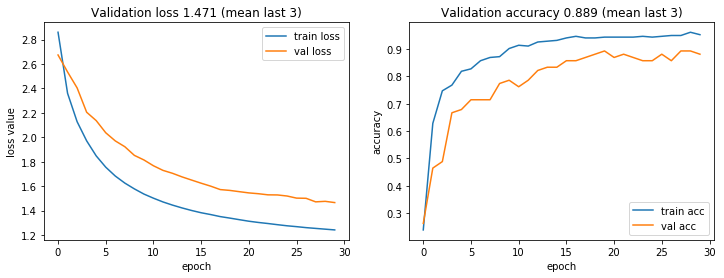

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [16]:
(test_loss, test_accuracy) = model_1n.evaluate(X['test'], y['test'], batch_size=16)

print('Test loss: {:.2f}'.format(test_loss)) # around 0.19
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) # around 95%

50/50 [==============================] - 0s 473us/step
Test loss: 1.31
Test accuracy: 94.00%


## 2-N layer

In [50]:
import tensorflow.keras as keras
from tensorflow.keras import activations


# Number of outputs
NB_CLASS=len(data['class_name'])


# Convolutional Network
model_2n = keras.Sequential()


model_2n.add(keras.layers.Dense(units=512, activation='relu', input_shape=(data['FEATURE_SIZE'],)))
model_2n.add(keras.layers.Dense(units=32, activation='relu'))
model_2n.add(keras.layers.Dense(units=NB_CLASS, activation='softmax'))

model_2n.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_31 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 198       
Total params: 1,065,702
Trainable params: 1,065,702
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile the model
model_2n.compile(optimizer=keras.optimizers.Adamax(), loss='categorical_crossentropy', metrics=['acc'])

In [58]:
# End training when accuracy stops improving (optional)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

In [62]:
# Fit model
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y['trainX'])

history = model_2n.fit(
    x=X['trainX'], y=y_categorical,
    validation_split=0.2, epochs=100,
    callbacks=[early_stopping],
    steps_per_epoch=10,
    shuffle=True # Shuffle training samples
)

model_2n.fit()

Epoch 1/100
 9/10 [==========================>...] - ETA: 0s - loss: 3.6542e-04 - acc: 1.0000

TypeError: float() argument must be a string or a number, not 'NoneType'

In [180]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(data['FEATURE_SIZE'],)))
# model.add(keras.layers.Dropout(rate=0.5))
model_3.add(tf.keras.layers.Dense(128, activation='relu'))
#model_3.add(tf.keras.layers.Dense(32, activation='relu'))
model_3.add(tf.keras.layers.Dense(6, activation='softmax'))
# model_3.compile(optimizer='sgd', loss='mse', metrics=['acc'])

# Compile the model
model_3.compile(optimizer=keras.optimizers.Adamax(), loss='sparse_categorical_crossentropy', metrics=['acc'])
model_3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])


# model_3.compile(optimizer=keras.optimizers.Adamax(), loss='mse', metrics=['acc'])

# End training when accuracy stops improving (optional)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# This builds the model for the first time:
history=model_3.fit(X['trainX'], y['trainX'], batch_size=64, epochs=30, validation_split=0.2, callbacks=[early_stopping])

Train on 336 samples, validate on 84 samples
Epoch 1/30
336/336 [==============================] - 2s 6ms/step - loss: 1.5507 - acc: 0.4196 - val_loss: 1.6176 - val_acc: 0.3690
Epoch 2/30
336/336 [==============================] - 0s 187us/step - loss: 1.1741 - acc: 0.6935 - val_loss: 1.4180 - val_acc: 0.5238
Epoch 3/30
336/336 [==============================] - 0s 193us/step - loss: 0.9514 - acc: 0.7560 - val_loss: 1.2506 - val_acc: 0.6429
Epoch 4/30
336/336 [==============================] - 0s 185us/step - loss: 0.7972 - acc: 0.8036 - val_loss: 1.0656 - val_acc: 0.7024
Epoch 5/30
336/336 [==============================] - 0s 186us/step - loss: 0.6742 - acc: 0.8542 - val_loss: 0.9291 - val_acc: 0.7857
Epoch 6/30
336/336 [==============================] - 0s 190us/step - loss: 0.5807 - acc: 0.8780 - val_loss: 0.8284 - val_acc: 0.7857
Epoch 7/30
336/336 [==============================] - 0s 188us/step - loss: 0.5073 - acc: 0.9137 - val_loss: 0.7862 - val_acc: 0.8095
Epoch 8/30
336/336 

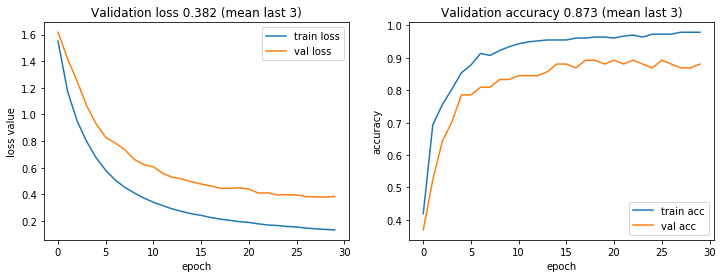

In [181]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [183]:
(test_loss, test_accuracy) = model_3.evaluate(X['test'], y['test'], batch_size=16)

print('Test loss: {:.2f}'.format(test_loss)) # around 0.19
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) # around 95%

50/50 [==============================] - 0s 364us/step
Test loss: 0.24
Test accuracy: 92.00%


In [171]:
pd.DataFrame(model_3.predict(X['train'][100:101]))


,0,1,2,3,4,5
0,0.001449,0.930088,0.003121,0.012063,0.00417,0.049109
